In [1]:
import glob
import shutil
import pathlib
import os
from image_processing import process_images
from affine import affine_main
import kornia.feature as KF
from descriptors import find_descriptors
from match_and_draw import match_draw

def main(dataset_original_imgs, new_path, kps_folder, desc_folder, desc_hard_path_save):

    #image processing
    process_images(dataset_original_imgs, new_path)
    
    #preprocessed images
    dataset_imgs = [img for img in glob.glob(new_path + '*.jpg')]

    #affine transformations
    for el in range(0,len(dataset_imgs)-1,2):
        print(dataset_imgs[el],dataset_imgs[el+1])
        affine_main(dataset_imgs[el],dataset_imgs[el+1], kps_folder, desc_folder)
    if len(dataset_imgs)%2!=0:
        print(dataset_imgs[-2], dataset_imgs[-1])
        affine_main(dataset_imgs[-2], dataset_imgs[-1], kps_folder, desc_folder)
    
    #find descriptors
    hardnet = KF.HardNet(True)
    path = pathlib.Path(desc_hard_path_save)
    if os.path.exists(path):
        shutil.rmtree(path)
    os.makedirs(path)

    dataset_kps = [img for img in glob.glob(kps_folder+'*')]

    for el in range(0,len(dataset_imgs)):
        print(dataset_kps[el])
        find_descriptors(dataset_kps[el]+'/',dataset_imgs[el], hardnet, desc_hard_path_save+'/'+str(el)+'.txt') 

    dataset_desc = [img for img in glob.glob(desc_hard_path_save+'/*')]

    for el in dataset_imgs:
        for e in range(0, len(dataset_imgs)):
            if dataset_imgs.index(el) != e:
                print(dataset_kps[dataset_imgs.index(el)], dataset_kps[e])
                try:
                    match_draw(el, dataset_imgs[e], dataset_kps[dataset_imgs.index(el)]+'/', dataset_kps[e]+'/', dataset_desc[dataset_imgs.index(el)], dataset_desc[e])
                except IndexError:
                    print('Error')

In [2]:
#пути до каждой исходной картинки
dataset_original_imgs = [img for img in glob.glob("D:/0f/*.jpg")]
#путь, где сохранится результат
new_path = "D:/0f_r/"

kps_folder = 'D:/0kps_fr/'
desc_folder = 'D:/0desc_fr/'
desc_hard_path_save='D:/0hard_fr'

D:/0f_r\0.jpg D:/0f_r\1.jpg
Extracting keypoints...


C:\Users\Darina\ffd_foerstner.py:17: FutureWarning: Until version 0.16, threshold_rel was set to 0.1 by default. Starting from version 0.16, the default value is set to None. Until version 0.18, a None value corresponds to a threshold value of 0.1. The default behavior will match skimage.feature.peak_local_max. To avoid this warning, set threshold_rel=0.
  peaks = corner_peaks(foerstner, min_distance=5)


Affine sampling: 43 / 43
Affine sampling: 43 / 43
94911.6301 ms
Done
D:/0kps_fr\0
D:/0kps_fr\1
D:/0kps_fr\0 D:/0kps_fr\1
pydegensac found 1369 inliers
4.24001  sec pydegensac
1369 inliers found
D:/0kps_fr\1 D:/0kps_fr\0
pydegensac found 1369 inliers
3.31000  sec pydegensac
1369 inliers found


<Figure size 432x288 with 0 Axes>

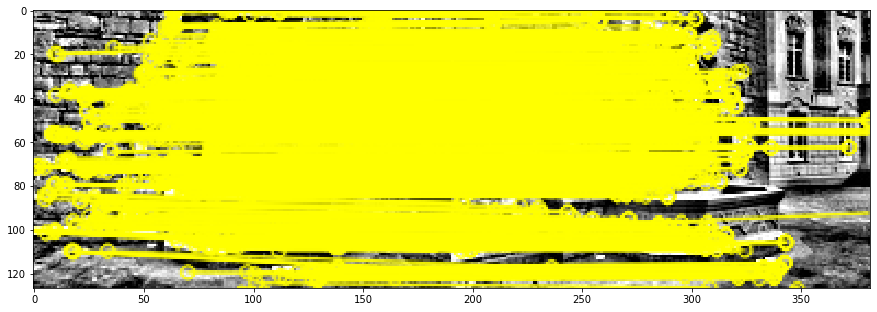

<Figure size 432x288 with 0 Axes>

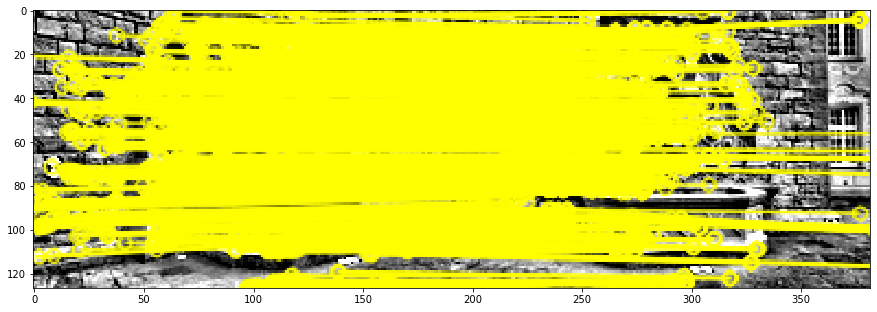

In [3]:
main(dataset_original_imgs, new_path, kps_folder, desc_folder, desc_hard_path_save)